## Arbres de décision

### Sommaire

* [Introduction](#intro)
* [Arbre de décision : Quésaco ?](#def)
* [Types d'arbre de décision](#types)
* [Implémentation avec Sklearn](#code_exemple)
* [Avantages et limites](#avantages)
* [Exemple](#exemple)
* [Apprentissage d'un arbre de décision](#apprentissage)
    * [Choix d'une variable de segmentation](#choix_seg)
    * [Traitement des variables continues](#var_continues)
    * [Choix de la taille de l'arbre](#choix_taille)
* [Application : prédire le prix des biens immobiliers à Boston](#boston)
* [Pour aller plus loin](#post_pruning)

### Ressources 
<a href="https://www.rocq.inria.fr/axis/modulad/archives/numero-33/tutorial-rakotomalala-33/rakotomalala-33-tutorial.pdf">Arbres de décision - Article scientifique</a> <br>
<a href="Decision Tree Regression" target="_blank">Decision Tree Regression in 6 Steps with Python</a><br>
<a href="https://scikit-learn.org/stable/modules/tree.html#">Decision Tree Scikit learn</a><br>

### Introduction <a class="anchor" id="intro"></a>

Considérons le jeu de données suivant, où $y$ est la variable expliquée (target, sortie) et $x$ est la variable explicative (feature, entrée). <br>
Un modèle basé sur un arbre de décision peut s'adapter facilement à ce type de problème où les données sont réparties en groupes différents. <br>
La popularité de la méthode repose en grande partie sur sa simplicité. 

### Arbre de décision : Quésaco ? <a class="anchor" id="def"></a>

Un arbre de décision est un modèle d'apprentissage supervisé simple.  <br>

Les arbres de décision, plus précisémment les forêts aléatoires (Random Forest), sont largement utilisées en entreprise pour faciliter le processus de prise de décision et l'analyse des risques.  Leur structure arborescente les rend lisibles par un être humain, contrairement à d'autres modèles où le prédicteur construit une "boite noire".

---

### Types d'arbre de décision <a class="anchor" id="types"></a>

Il existe deux arbres de décision :

* **Arbres de régression (Regression Tree)**: <br> 
Ils sont utilisés pour répondre à des problèmes de régression où la valeur de sortie (target ou variable explicative) est une variable continue. Pour prédire cette variable, l'étiquette de chaque feuille de l'arbre est la moyenne des valeurs. 
* **Arbres de classification (Classification Tree)**<br>
Ils sont utilisés pour répondre à des problèmes de classification où la valeur de sortie est une variable catégorielle. 


---

### Implémentation avec sklearn <a class="anchor" id="code_exemple"></a>

Un modèle de classification avec des arbres de décision peut être implémenté avec la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?">DecisionTreeClassifier</a> du package *sklear.tree*<br>


#### Librairies 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scikitplot as skplt
from sklearn import metrics

#### Jeu de données
Charger le jeu de données <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.breast_cancer.html?highlight=diabetes#sklearn.datasets.breast_cancer">breast_cancer</a> de sklearn 
* Utiliser la fonction *load_breast_cancer()* du package *sklearn.datasets*
* Affecter les features à la variable X
* Affecter la target à la variable y
* Afficher la description du jeu de données en utilisant l'attribut *DESCR* du dictionnaire data. 

In [4]:
from sklearn.datasets import load_breast_cancer

# chargement du jeu de données iris 
data = load_breast_cancer()
# variables dépendantes (features)
X = data.data
# variable indépendante (target) 
y = data.target
# description détaillée du jeu de données. 
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### Données d'entraînement et de test
Diviser le jeu de données en jeu de données d'entraînement (70%) et de test (30%) en utilisant la fonction *train_test_split* du package *sklearn.model_selection* 
* paramètres : random_state = 0

In [5]:
# importer la méthode train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

Comment le paramètre *random_state* influence le split du dataset ? <br>
**Ressources** 
<a href="https://www.bitdegree.org/learn/train-test-split">Splitting Datasets With the Sklearn train_test_split Function</a>

* Quand on souhaite valider nos résultats avec plusieurs exécutions, il faut fixer la valeur du random_state pour garantir que la même séquence de nombre aléatoire est générée à chaque fois que le code est exécuté. 
* La valeur choisie est utilisée pour initialiser le générateur de nombres aléatoires pour diviser les données en indices de train et de test. 
* Les exemples de la documentation de sklearn, utilisent la valeur 42 pour le random_state. 

#### Modèle | DecisionClassifierTree
**Question** :<br>
Créer l'objet *classifier* de la classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">*DecisionClassifierTree*</a> du package *sklearn.tree*. <br>
Utiliser les paramètres par défaut.

In [6]:
# importer la classe DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# créer le modèle d'arbre de décision '
# avec les paramètres par défaut 
classifier = DecisionTreeClassifier()
# notre modèle est stocké dans la variable classifier 

#### Entraînement du l'arbre de classification

Utiliser la méthode *fit* de la classe *DecisionTreeClassifier* pour entraîner le modèle d'arbre de classification *classifier* en utilisant les données d'entraînement *X_train* et *y_train* (algorithme supervisé)

In [7]:
# entraîner le modèle 
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

#### Prédiction
Prédire si la tumeur est maligne des données de test *X_test* en utilisant le modèle entraîné précédemment et la méthode *predict* de la classe *DecisionTreeClassifier* avec comme paramètre les données de test.<br>
Stocker le résultat de la prédiction dans la variable y_pred

In [8]:
y_pred = classifier.predict(X_test)
y_pred.shape

(171,)

#### Visualisation de l'arbre de décision
Il existe plusieurs manière pour visualiser l'arbre de décision pour une meilleure lisibilité et interprétation du modèle. <br>
Ressource : <a href="https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc">*Visualizing DEcision Trees with Python (Scikit-lean, Graphiz, Matplotlib*</a>


Visualiser le modèle *classifier* en utilisant <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree">*plot_tree*</a> du package *skleran.tree*

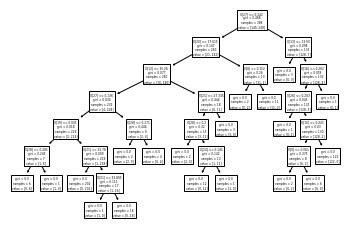

In [9]:
from sklearn import tree
tree.plot_tree(classifier);

L'arbre généré est-il exploitable ? <br>
Conclure !

Nous avons utilisé les paramètres par défaut. Le modèle obtenu décrit dans les détails les règles de décision. <br>
On peut déjà conclure que le modèle est en sur-apprentissage (overfitting).

**Question**<br>Créer un modèle d'arbre de décision avec le paramètre *max_depth=3*. Afficher l'abre de décision. Conclure. 

In [10]:
# créer le modèle d'arbre de décision '
# avec le paramètre max_depth = 3
# le but est de ne pas laisser l'arbre se développer et sur-apprendre 
classifier = DecisionTreeClassifier(max_depth=3)
# notre modèle est stocké dans la variable classifier (l'ancier classifier est donc écrasé)

# entraîner le classifier 
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

## FIN PARTIE I

#### Evaluation 

Evaluer la qualité du modèle en utilisant la méthode *classification report* pour les données d'entraînement et de test. 

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.95      0.89        63
           1       0.97      0.89      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



- une macro-moyenne effectue une moyenne suite au calcul de la métrique indifféremment des classes. 
- Au contraire, une micro-moyenne prendra en compte les contributions de chaque classe pour calculer la métrique moyenne.

Afficher la matrice de confusion en utilisant la méthode *metrics.ConfusionMatrixDisplay.from_predictions*

Confusion matrix:
[[ 59   4]
 [  6 102]]


C:\Users\Pontiff\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


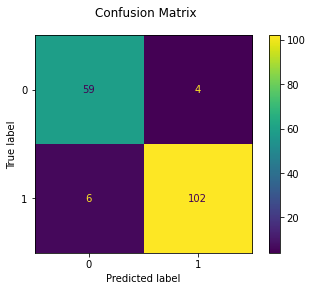

In [14]:
disp = metrics.plot_confusion_matrix(classifier,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Afficher la **courbe roc** relative au classifier en utilisant la méthode *plot_roc_curve*

C:\Users\Pontiff\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


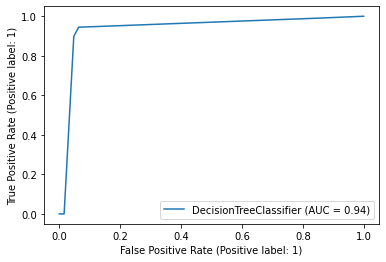

In [17]:
metrics.plot_roc_curve(classifier, X_test, y_test) 

Afficher la **courbe d'apprentissage** du classifier en utilisant la méthode *plot_learning_curve* du module *estimators* de scikit plot

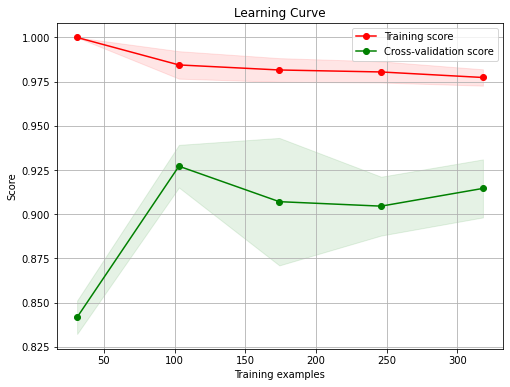

In [18]:
skplt.estimators.plot_learning_curve(classifier, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

#### Intérpretation  


$Accuracy_{train} = 1 $ <br>Ce qui veut dire que le modèle décrit parfaitement les données d'apprentissage. <br>
Cependant, $Accuracy_{test} =0.9$ <br>Ce qui expliquer le **sur-apprentissage** du modèle. Le modèle donne une prédiction de moindre qualité que la ligne droite. <br>
Avant de conclure que le modèle d'arbre de décision n'est pas adapté à ce dataset, il faut faire un travail d'optimisation des paramètres du modèle, que nous avons choisi dans ce cas par défaut !

---

### Algorithmes de construction des arbres de décision<a class="anchor" id="algos"></a>


**Ressource** : <br>
<a href="https://scikit-learn.org/stable/modules/tree.html#">Decision Trees - Scikit Learn</a>


* **ID3 Iterative Dichotomiser 3** <br>
ID3 construit l'arbre de décision récursivement. À chaque étape de la récursion, il calcule parmi les attributs restant pour la branche en cours, celui qui maximisera le gain d'information. C’est-à-dire l'attribut qui permettra le plus facilement de classer les exemples à ce niveau de cette branche de l'arbre. On appelle ce calcul l'entropie de Shannon. <br>
* **C4.5** <br>
L'algorithme C4.5 se base sur une mesure de l'entropie dans l'échantillon d'apprentissage pour produire le modèle (graphe d'induction). L'avantage du recours à l'entropie est que l'algorithme opère sur des données symboliques que ce soient des variables catégorielles ou numériques discrètes. <br>
Le désavantage de la méthode est que pour préserver l'efficacité de l'apprentissage et la pertinence du modèle produit, les variables continues doivent être discrétisées avant la mise en œuvre de l'algorithme.
* **C5.0** <br>
C5.0 est un produit commercial dont le code source est disponible gratuitement pour l'interprétation et l'utilisation des arbres de décision et l'ensemble des règles qu'il produit. <br>
* **CART Classification And Regression Trees** <br>
L'algorithme construit un arbre de décision d'une manière analogue à l'algorithme ID3. Contrairement à ce dernier, l'arbre de décision généré par CART est binaire (un nœud ne peut avoir que deux fils) et le critère de segmentation est l'indice de diversité de Gini.



### Exemple <a class="anchor" id="exemple"></a> <br>
Pour mieux comprendre comment l'arbre de décision est construit, un exemple est détaillé <a href="https://www.saedsayad.com/decision_tree_reg.htm#:~:text=Decision%20tree%20builds%20regression%20or,decision%20nodes%20and%20leaf%20nodes">ici</a>. <br>
L'exemple utilise l'algorithme ID3, qui est la base de CART utilisé par scikit learn. 

---

## PARTIE II

Développer un modèle basé sur l'algorithme d'**arbre de décision** et le dataset **Iris** disponible sur scikit-learn en reprenant les étapes de construction d'un modèle décrite ci-dessus. 
<br>Evaluer le modèle en utilisant les métriques appropriées. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.94      0.97      0.95        32
           2       0.97      0.94      0.95        32

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

Confusion  Matrix:
[[26  0  0]
 [ 0 31  1]
 [ 0  2 30]]


C:\Users\Pontiff\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


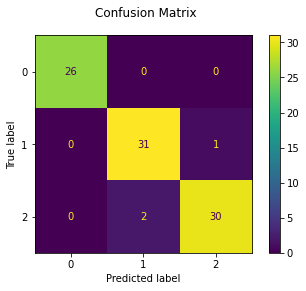

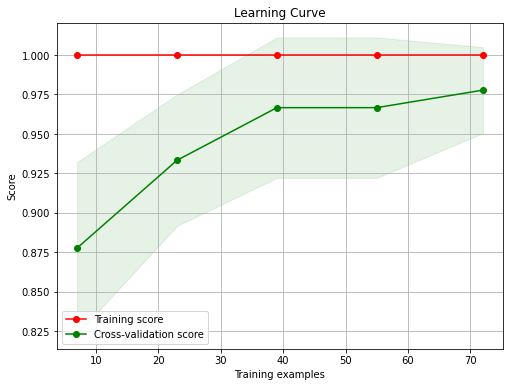

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import sklearn

from sklearn import datasets
iris = sklearn.datasets.load_iris()
x = iris.data
y = iris.target

from sklearn import model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.60, random_state=69)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

iris_classifier = DecisionTreeClassifier()

iris_classifier.fit(x_train, y_train)

y_pred = iris_classifier.predict(x_test)
y_pred.shape

tree.export_graphviz(iris_classifier)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

disp = metrics.plot_confusion_matrix(iris_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion  Matrix:\n{disp.confusion_matrix}")

skplt.estimators.plot_learning_curve(iris_classifier, x_test, y_test, figsize=(8,6))
plt.title('Learning Curve')
plt.show()

### Pour aller plus loin : <a class="anchor" id="post_pruning"></a>
<a href="https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py">Post élagage avec scikit learn | Exemple </a>